In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Pull Data from CSV
file_path = '0.lvm'
df = pd.read_csv(file_path, sep='\t', skiprows=23, header=None)
t = df.iloc[:, 0].to_numpy()
voltage_data_0 = df.iloc[:, 1].to_numpy()
file_path = '91.lvm'
df = pd.read_csv(file_path, sep='\t', skiprows=23, header=None)
voltage_data_90 = df.iloc[:, 1].to_numpy()
file_path = '180.lvm'
df = pd.read_csv(file_path, sep='\t', skiprows=23, header=None)
voltage_data_180 = df.iloc[:, 1].to_numpy()
dt = t[1]-t[0]
FS = 1/dt

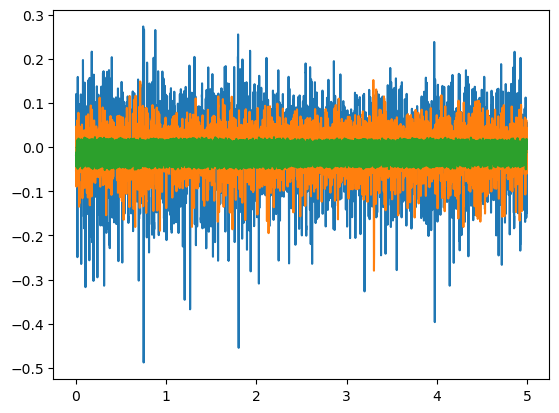

In [3]:
#initial Plot
plt.plot(t, voltage_data_180, label = '180', alpha = 1)
plt.plot(t, voltage_data_90, label = '90', alpha = 1)
plt.plot(t, voltage_data_0, label = '0', alpha = 1)
fvec = np.linspace(-FS/2, FS/2, len(voltage_data_0))

In [4]:
#TAKE FFT
FT_voltage_data_0 = np.fft.fftshift(np.fft.fft(voltage_data_0))
FT_voltage_data_norm_0 = np.abs(FT_voltage_data_0)/np.max(np.abs(FT_voltage_data_0))
FT_dB_0 = 20*np.log10(FT_voltage_data_norm_0)
#TAKE FFT
FT_voltage_data_90 = np.fft.fftshift(np.fft.fft(voltage_data_90))
FT_voltage_data_norm_90 = np.abs(FT_voltage_data_90)/np.max(np.abs(FT_voltage_data_90))
FT_dB_90 = 20*np.log10(FT_voltage_data_norm_90)
#TAKE FFT
FT_voltage_data_180 = np.fft.fftshift(np.fft.fft(voltage_data_180))
FT_voltage_data_norm_180 = np.abs(FT_voltage_data_180)/np.max(np.abs(FT_voltage_data_180))
FT_dB_180 = 20*np.log10(FT_voltage_data_norm_180)

In [5]:
#Determine cutoff frequencies.

#Start at positive index
halfway_index = len(FT_voltage_data_norm_90) // 2
#Find all indices where we are above 3%
filtered_indices = np.where(FT_voltage_data_norm_90[halfway_index:] >= 0.03)[0]
#Find first and last index
if len(filtered_indices) > 0:
    first_index = filtered_indices[0] + halfway_index
    last_index = filtered_indices[-1] + halfway_index
    

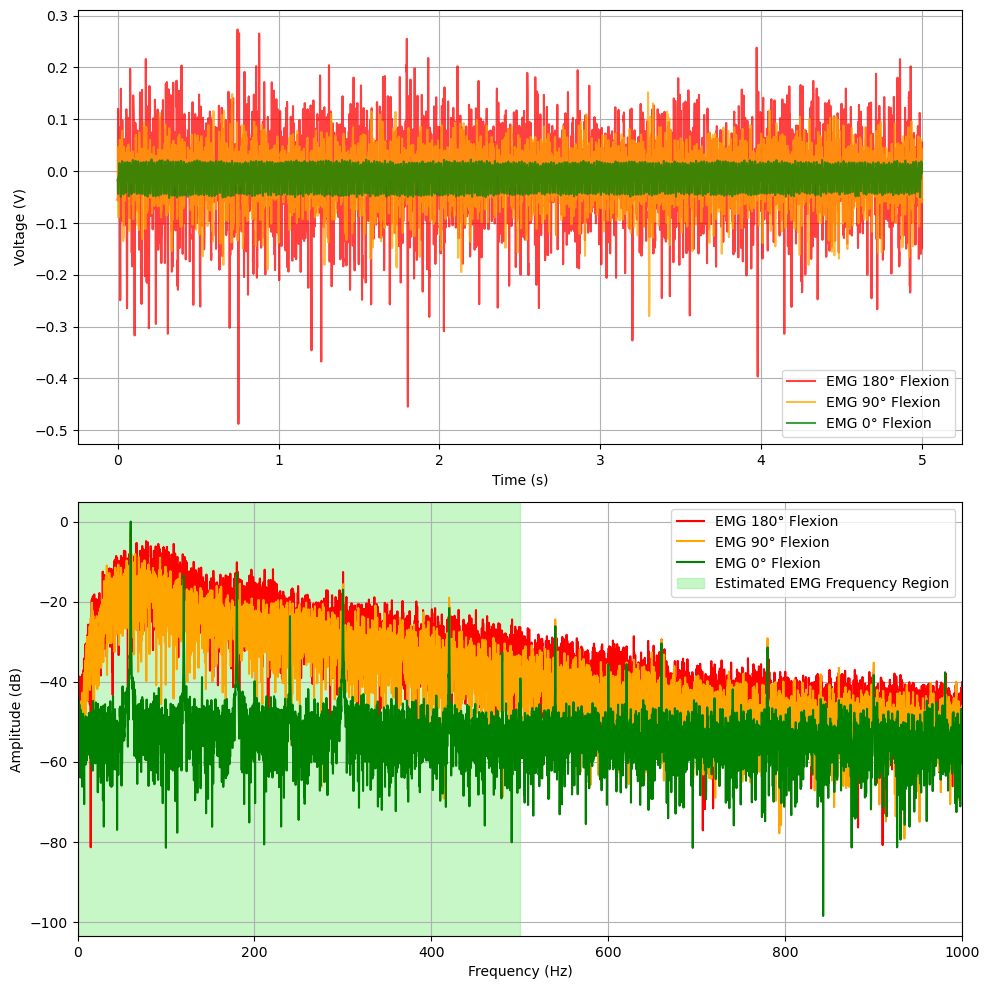

In [6]:
#PLOTTING
plt.figure(figsize = (10, 10))
#NO X LIMIT PLOTS

#making 2x1 subplot
plt.subplot(2, 1, 1)
plt.plot(t, voltage_data_180, color = 'red', label='EMG 180° Flexion', alpha = 0.75)
plt.plot(t, voltage_data_90, color = 'orange', label='EMG 90° Flexion', alpha = 0.75)
plt.plot(t, voltage_data_0, color = 'green', label='EMG 0° Flexion', alpha = 0.75)

plt.grid()
#Full Range
#plt.xlim(0, )
#Label Axes
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.legend()


plt.subplot(2, 1, 2)

plt.plot(fvec, FT_dB_180, color = 'red', label='EMG 180° Flexion')
plt.plot(fvec, FT_dB_90, color = 'orange', label='EMG 90° Flexion')
plt.plot(fvec, FT_dB_0, color = 'green', label='EMG 0° Flexion')

plt.grid()
#Label Axes
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude (dB)")
#Limit X Range
plt.xlim(0, FS/2)
plt.axvspan(fvec[first_index], 500, color='lightgreen', alpha=0.5, label='Estimated EMG Frequency Region')
plt.legend()
plt.tight_layout()
plt.show()

In [7]:
#apply artificial 60 Hz Filter

filter60 = np.multiply(np.abs(fvec-60) > 10, np.abs(fvec+60) > 10)
filtered_0 = np.multiply(filter60, FT_voltage_data_0)
filtered_90 = np.multiply(filter60, FT_voltage_data_90)
filtered_180 = np.multiply(filter60, FT_voltage_data_180)

t_filtered_0 = np.fft.ifft(np.fft.fftshift(filtered_0))
t_filtered_90 = np.fft.ifft(np.fft.fftshift(filtered_90))
t_filtered_180 = np.fft.ifft(np.fft.fftshift(filtered_180))


/Users/brandonlu/anaconda3/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


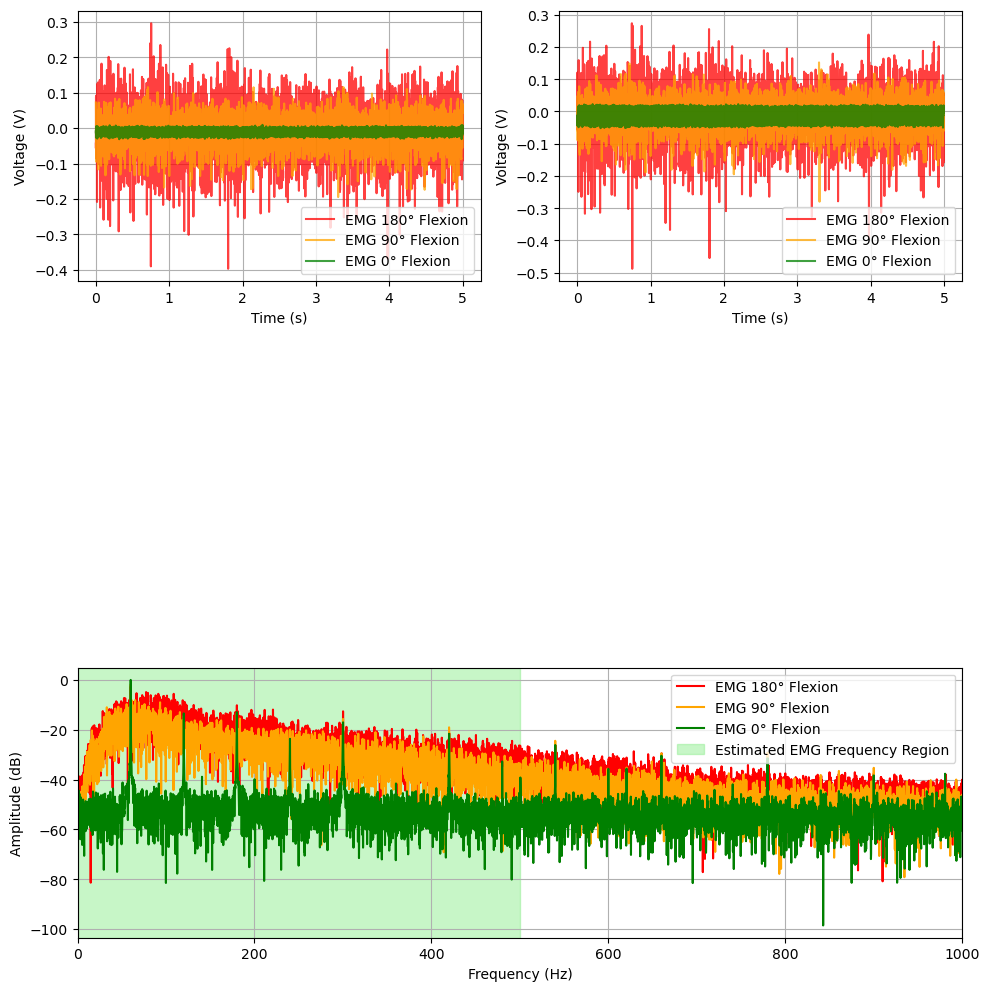

In [8]:
#Comparison of data with and without digital 60 hz filter

#PLOTTING
plt.figure(figsize = (10, 10))
#NO X LIMIT PLOTS

#making 2x1 subplot
plt.subplot(3, 2, 1)
plt.plot(t, t_filtered_180, color = 'red', label='EMG 180° Flexion', alpha = 0.75)
plt.plot(t, t_filtered_90, color = 'orange', label='EMG 90° Flexion', alpha = 0.75)
plt.plot(t, t_filtered_0, color = 'green', label='EMG 0° Flexion', alpha = 0.75)
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.legend()
plt.grid()

plt.subplot(3, 2, 2)
plt.plot(t, voltage_data_180, color = 'red', label='EMG 180° Flexion', alpha = 0.75)
plt.plot(t, voltage_data_90, color = 'orange', label='EMG 90° Flexion', alpha = 0.75)
plt.plot(t, voltage_data_0, color = 'green', label='EMG 0° Flexion', alpha = 0.75)

plt.grid()
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.legend()


plt.subplot(3, 1, 3)

plt.plot(fvec, FT_dB_180, color = 'red', label='EMG 180° Flexion')
plt.plot(fvec, FT_dB_90, color = 'orange', label='EMG 90° Flexion')
plt.plot(fvec, FT_dB_0, color = 'green', label='EMG 0° Flexion')

plt.grid()
#Label Axes
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude (dB)")
#Limit X Range
plt.xlim(0, FS/2)
plt.axvspan(fvec[first_index], 500, color='lightgreen', alpha=0.5, label='Estimated EMG Frequency Region')
plt.legend()
plt.tight_layout()
plt.show()

#Left plot is 60 hz digital filter. Right is without